In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import src.preprocess as prep
import src.eda as eda

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
# Set plot sizes
SMALL_SIZE = 22
MEDIUM_SIZE = 24
BIGGER_SIZE = 26
BIGGEST_SIZE = 28

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGEST_SIZE)  # fontsize of the figure title

# Load Data

In [4]:
path_to_dir = 'data'

df = prep.merge_csv_mult_dir(path_to_dir)

Non-zip folders/files found in data: ['links_1']


In [5]:
print('Shape:', df.shape)
df.head()

Shape: (333032, 11)


,review_id,url,hotel_name,review_date,review_body,user_location,user_name,helpful_vote,rating,csv,folder
0,751960476,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"March 28, 2020",Originally I picked this hotel as it was near ...,"Phoenix, Arizona","thechronictraveller</div><div class=""userLoc"">...",23,4.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1
1,736861148,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"January 4, 2020",This is a great hotel. It's away from Waikiki ...,"Lewisburg, Tennessee","bitsmom_tn</div><div class=""userLoc""><strong>L...",56,5.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1
2,751805209,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"March 25, 2020","When I checked out of my room, I left my Kindl...",NaN,D7133GLjoannew,0,5.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1
3,749977541,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"March 8, 2020","Honestly, I was not expecting much but the hot...",Los Angeles,"Adrian L</div><div class=""userLoc""><strong>Los...",209,4.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1
4,749895049,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"March 8, 2020",Clean and convenient place if you need to be n...,NaN,Lydia B,0,4.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1


In [6]:
eda.get_nulls(df)

,Total,Percent,Type
user_location,54216,0.162795,object
folder,0,0.000000,object
csv,0,0.000000,object
rating,0,0.000000,float64
helpful_vote,0,0.000000,int64
user_name,0,0.000000,object
review_body,0,0.000000,object
review_date,0,0.000000,object
hotel_name,0,0.000000,object
url,0,0.000000,object


In [7]:
df = prep.clean_and_prep(df)

print('Shape:', df.shape)
df.head()

Shape: (333032, 16)


,review_id,url,hotel_name,review_date,review_body,user_location,user_name,helpful_vote,rating,csv,folder,city,user_name_clean,polarity,sentiment_int,sentiment
0,751960476,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"March 28, 2020",Originally I picked this hotel as it was near ...,"Phoenix, Arizona","thechronictraveller</div><div class=""userLoc"">...",23,4.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1,Honolulu_Oahu_Hawaii,thechronictraveller,1.0,2,positive
1,736861148,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"January 4, 2020",This is a great hotel. It's away from Waikiki ...,"Lewisburg, Tennessee","bitsmom_tn</div><div class=""userLoc""><strong>L...",56,5.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1,Honolulu_Oahu_Hawaii,bitsmom_tn,1.0,2,positive
2,751805209,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"March 25, 2020","When I checked out of my room, I left my Kindl...",n/a,D7133GLjoannew,0,5.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1,Honolulu_Oahu_Hawaii,D7133GLjoannew,1.0,2,positive
3,749977541,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"March 8, 2020","Honestly, I was not expecting much but the hot...",Los Angeles,"Adrian L</div><div class=""userLoc""><strong>Los...",209,4.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1,Honolulu_Oahu_Hawaii,Adrian L,1.0,2,positive
4,749895049,https://www.tripadvisor.com/Hotel_Review-g6098...,Best Western The Plaza Hotel,"March 8, 2020",Clean and convenient place if you need to be n...,n/a,Lydia B,0,4.0,Best_Western_The_Plaza_Hotel-Honolulu_Oahu_Haw...,links_1,Honolulu_Oahu_Hawaii,Lydia B,1.0,2,positive


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333032 entries, 0 to 333031
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   review_id        333032 non-null  int64  
 1   url              333032 non-null  object 
 2   hotel_name       333032 non-null  object 
 3   review_date      333032 non-null  object 
 4   review_body      333032 non-null  object 
 5   user_location    333032 non-null  object 
 6   user_name        333032 non-null  object 
 7   helpful_vote     333032 non-null  int64  
 8   rating           333032 non-null  float64
 9   csv              333032 non-null  object 
 10  folder           333032 non-null  object 
 11  city             333032 non-null  object 
 12  user_name_clean  333032 non-null  object 
 13  polarity         333032 non-null  float64
 14  sentiment_int    333032 non-null  int64  
 15  sentiment        333032 non-null  object 
dtypes: float64(2), int64(3), object(11)
me

# EDA

In [9]:
eda.print_unique_ct(df)

Count of Unique Values per Column:

review_id: 333028
url: 66685
hotel_name: 263
review_date: 5647
review_body: 332985
user_location: 35217
user_name: 293810
helpful_vote: 901
rating: 5
csv: 263
folder: 1
city: 41
user_name_clean: 261294
polarity: 3
sentiment_int: 3
sentiment: 3


In [10]:
df.describe()

,review_id,helpful_vote,rating,polarity,sentiment_int
count,3.330320e+05,333032.000000,333032.000000,333032.000000,333032.000000
mean,4.206621e+08,27.875435,4.120676,0.841251,1.682502
std,1.954686e+08,269.032950,1.096938,0.320471,0.640943
min,7.051910e+05,0.000000,1.000000,0.000000,0.000000
25%,2.499110e+08,1.000000,4.000000,1.000000,2.000000
50%,4.313429e+08,7.000000,4.000000,1.000000,2.000000
75%,5.879052e+08,26.000000,5.000000,1.000000,2.000000
max,7.555458e+08,115958.000000,5.000000,1.000000,2.000000


(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a40630b50>)

Text(0.5, 1, 'Initial Balance of Review Sentiments')

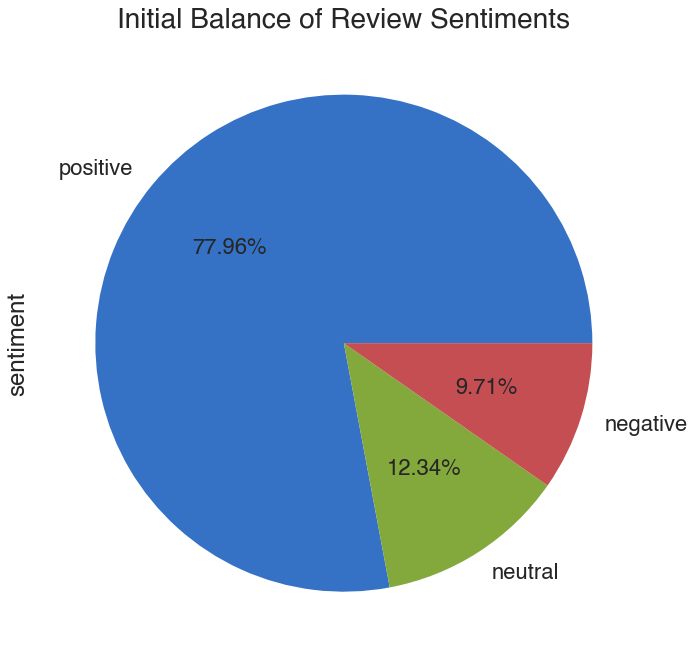

In [11]:
# Plot pie - Sentiments
fig, ax = plt.subplots(figsize=(10,10))
eda.plot_pie(df['sentiment'], fig, ax)
ax.set_title('Initial Balance of Review Sentiments', size=BIGGEST_SIZE)
fig.savefig('imgs/pie_sentiments_initial')

Total Number of Ratings:  333032


(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a40753810>)

Text(0.5, 1, 'Counts of Hotel Ratings')

Text(0.5, 41.400000000000006, 'Hotel Rating')

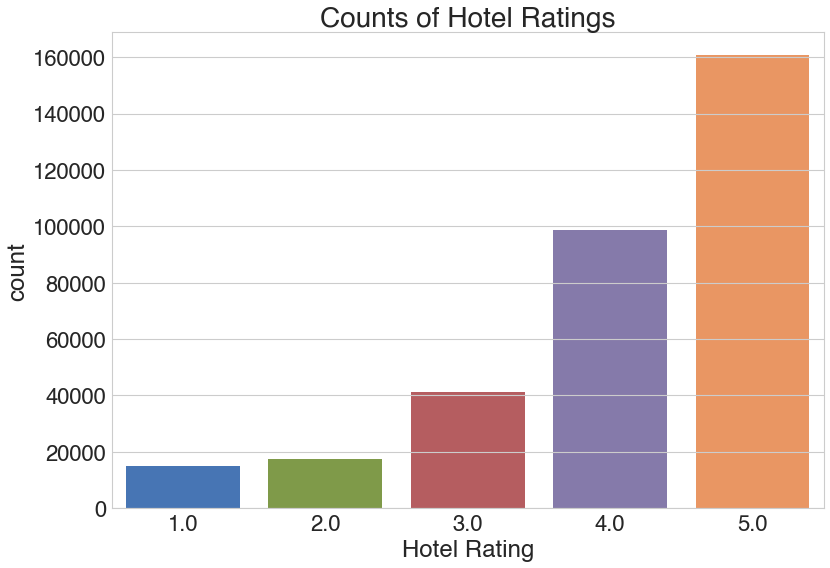

In [12]:
# Plot counts - Ratings
print('Total Number of Ratings: ', df.shape[0])

fig, ax = plt.subplots(figsize=(12,8))
eda.plot_counts(df, 'rating', fig, ax)
ax.set_title('Counts of Hotel Ratings', size=BIGGEST_SIZE)
ax.set_xlabel('Hotel Rating')
fig.savefig('imgs/countplot_ratings_full')

# Train-Test Split

In [13]:
target = 'sentiment'
indices = df.index

X = df['review_body']
y = df[target].to_numpy()

X.shape, y.shape

((333032,), (333032,))

In [14]:
X_train_init, X_test, y_train_init, y_test, indices_train_init, indices_test = \
    train_test_split(X, y, indices, test_size=0.2, shuffle=True, stratify=y, random_state=42)
indices_train_init.shape, indices_test.shape

((266425,), (66607,))

In [15]:
# Get train_init df with train indices
train_init_df = df.iloc[indices_train_init,:]
train_init_df.shape

(266425, 16)

In [16]:
X_train_init2 = train_init_df['review_body']
y_train_init2 = train_init_df[target].to_numpy()
train_init_indices2 = train_init_df.index
train_init_indices2.shape

(266425,)

In [17]:
X_train, X_val, y_train, y_val, indices_train, indices_val = \
    train_test_split(X_train_init, y_train_init, train_init_indices2, test_size=0.2, 
                     shuffle=True, stratify=y_train_init, random_state=42)
indices_train.shape, indices_val.shape

((213140,), (53285,))

## Handling class imbalance by under-sampling train data

In [18]:
# Get train df with train indices
train_df = df.iloc[indices_train,:]
train_df.shape

(213140, 16)

In [19]:
# Get classes and counts
unique, counts = np.unique(y_train, return_counts=True)

In [20]:
# Determine majority, middle, and minority classes
majority_class = unique[np.argmax(counts)]
minority_class = unique[np.argmin(counts)]
mid_class = np.unique(y_train[(y_train!=majority_class) & (y_train!=minority_class)])[0]
print('Majority: {}, Middle: {}, Minority: {}'.format(majority_class, mid_class, minority_class))

Majority: positive, Middle: neutral, Minority: negative


In [21]:
# Get indices per class
class_indices = dict.fromkeys([majority_class, mid_class, minority_class])
for key in class_indices:
    class_indices[key] = train_df[train_df[target]==key].index
    print('{} indices length: {}'.format(key, class_indices[key].shape[0]))

positive indices length: 166155
neutral indices length: 26299
negative indices length: 20686


In [22]:
# Randomly under-sample majority and middle class indices to get new under-sampled train df
np.random.seed(42)
rand_maj_indices = np.random.choice(class_indices[majority_class], class_indices[minority_class].shape[0], replace=False)
rand_mid_indices = np.random.choice(class_indices[mid_class], class_indices[minority_class].shape[0], replace=False)
undersample_indices = np.concatenate([class_indices[minority_class], rand_mid_indices, rand_maj_indices])

train_df_us = df.iloc[undersample_indices,:]
train_df_us.shape

(62058, 16)

Total Number of Ratings:  62058


(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a4152b8d0>)

Text(0.5, 1, 'Balance of Review Sentiments,\nAfter Under-Sampling Train')

Text(93.2, 0.5, '')

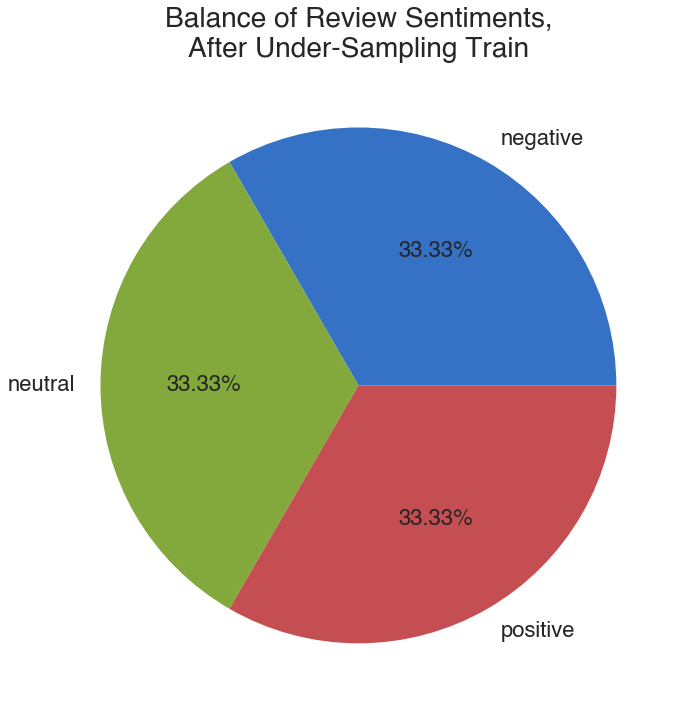

In [23]:
# Plot pie - Classes after undersampling
print('Total Number of Ratings: ', train_df_us.shape[0])

fig, ax = plt.subplots(figsize=(10,10))
eda.plot_pie(train_df_us[target], fig, ax)
ax.set_title('Balance of Review Sentiments,\nAfter Under-Sampling Train', size=BIGGEST_SIZE)
ax.set_ylabel('')
fig.savefig('imgs/pie_sentiments_train_undersample')

# Train-Test-Val Split

In [24]:
target = 'sentiment'
features = ['review_body']
X_train, X_val, X_test, y_train, y_val, y_test, \
    indices_train, indices_val, indices_test = prep.train_test_val_split(df, target, features)

train: 213140, val: 53285, test: 66607


In [25]:
indices_train.shape, indices_val.shape, indices_test.shape

((213140,), (53285,), (66607,))

## Handling class imbalance by under-sampling train data

In [26]:
train_df_us = prep.undersample_train(df, target, indices_train, y_train)

Majority Class: positive, Middle Class: neutral, Minority Class: negative
positive indices length: 166155
neutral indices length: 26299
negative indices length: 20686
undersampled train shape: (62058, 16)


Total Number of Ratings:  62058


(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a4154da50>)

Text(0.5, 1, 'Balance of Review Sentiments,\nAfter Under-Sampling Train')

Text(93.2, 0.5, '')

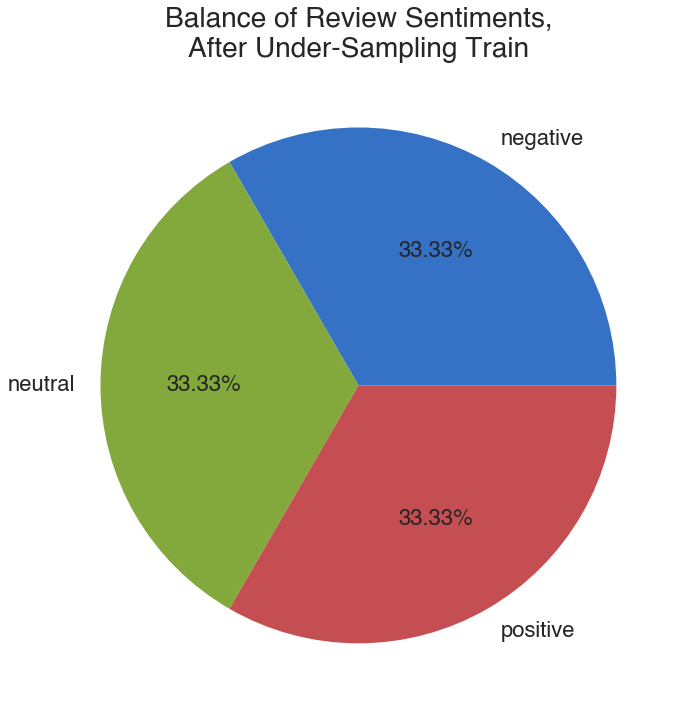

In [27]:
# Plot pie - Classes after undersampling
print('Total Number of Ratings: ', train_df_us.shape[0])

fig, ax = plt.subplots(figsize=(10,10))
eda.plot_pie(train_df_us[target], fig, ax)
ax.set_title('Balance of Review Sentiments,\nAfter Under-Sampling Train', size=BIGGEST_SIZE)
ax.set_ylabel('')
fig.savefig('imgs/pie_sentiments_train_undersample')